In [1]:
# Loading the dataset
# Import pandas library
import pandas as pd
# Import numpy
import numpy as np
# Reading the dataset
mydata = pd.read_csv("MPD-area-radiusandulna-aim.csv")

In [2]:
mydata.head()

URN  R_area  U_area  AIM
0  ML018_PD_001   0.000     0.0  243
1  ML018_PD_002  71.625     0.0  243
2  ML018_PD_003  24.750     0.0  243
3  ML018_PD_004  38.750     0.0  243
4  ML018_PD_005  27.875     0.0  243

In [3]:
mydata.describe()

R_area      U_area         AIM
count  951.000000  951.000000  951.000000
mean    69.010778   25.074132  252.256572
std    131.818413   62.851888   48.132901
min      0.000000    0.000000  123.000000
25%      0.000000    0.000000  217.000000
50%      0.000000    0.000000  259.000000
75%     60.812500    0.000000  295.000000
max    627.500000  479.625000  323.000000

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   URN     951 non-null    object 
 1   R_area  951 non-null    float64
 2   U_area  951 non-null    float64
 3   AIM     951 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 29.8+ KB


In [5]:
X = mydata.drop(['URN', 'AIM'], axis = 1)
print(X)

     R_area  U_area
0     0.000     0.0
1    71.625     0.0
2    24.750     0.0
3    38.750     0.0
4    27.875     0.0
..      ...     ...
946  35.750     0.0
947   6.250     0.0
948   0.000     0.0
949   0.000     0.0
950  32.875     0.0

[951 rows x 2 columns]


In [6]:
y = mydata['AIM']
print(y)

0      243
1      243
2      243
3      243
4      243
      ... 
946    298
947    298
948    298
949    298
950    298
Name: AIM, Length: 951, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Splitting the dataset in train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(665, 2) (286, 2) (665,) (286,)


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 358 to 684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_area  665 non-null    float64
 1   U_area  665 non-null    float64
dtypes: float64(2)
memory usage: 15.6 KB


In [9]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 665 entries, 358 to 684
Series name: AIM
Non-Null Count  Dtype
--------------  -----
665 non-null    int64
dtypes: int64(1)
memory usage: 10.4 KB


In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 873 to 477
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_area  286 non-null    float64
 1   U_area  286 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


In [11]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 286 entries, 873 to 477
Series name: AIM
Non-Null Count  Dtype
--------------  -----
286 non-null    int64
dtypes: int64(1)
memory usage: 4.5 KB


In [12]:
pd.set_option('display.max_rows', 500)
print(y_test)

873    299
568    173
249    264
331    323
492    183
692    217
821    314
724    320
14     231
31     314
758    123
691    293
634    211
499    257
231    256
215    305
642    208
202    251
794    249
298    265
875    308
342    190
803    273
372    298
77     275
567    173
440    269
317    319
386    312
566    173
615    154
940    298
524    312
894    323
101    277
501    257
402    194
200    259
345    190
672    298
380    226
732    312
278    295
439    269
367    298
204    251
350    190
337    323
196    259
735    312
891    323
750    207
597    224
382    226
310    319
947    298
926    285
295    265
363    298
97     183
299    265
933    200
55     261
746    207
285    250
743    207
538    270
640    208
247    289
678    217
65     305
868    299
252    264
862    299
141    142
688    293
264    206
827    314
513    288
409    202
453    291
742    207
60     305
142    142
145    142
676    217
877    308
236    286
366    298
603    224
671    298

In [13]:
# Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Instantiation of the model

model = DecisionTreeRegressor()
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', model)
        ])

In [14]:
# Fitting the model

Age_dt = model.fit(X_train, y_train)

In [15]:
# Training model evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# The training r_sq
print('The training r_sq is: %.2f' % Age_dt.score(X_train, y_train))

# Prediction on the training dataset
ytrain_pred = Age_dt.predict(X_train)

# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_train, ytrain_pred))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_train, ytrain_pred))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_train, ytrain_pred))

# The RMSE
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_train, ytrain_pred))

The training r_sq is: 0.75
The MAE is: 15.72
The MAPE is: 0.06
The MSE is: 546.39
The RMSE is: 23.38
The EVS is: 0.75


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Age_dt, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
rf_rmse_scores = np.sqrt(-scores)

In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(rf_rmse_scores)

Scores: [28.61886733 33.79162674 35.34784083 27.71991295 31.33167161 36.9330401
 33.81590792 32.32352268 28.71087076 33.83782792]
Mean: 32.24310888326827
Standard deviation: 2.9318572137008676


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_features': [2, 4, 6, 8]}, 
    {'max_features': [2, 4, 6, 8], 'max_depth': [2, 4, 8, 16, 36, 64]}
]

Age_dt = DecisionTreeRegressor()

grid_search = GridSearchCV(Age_dt, param_grid, cv= 10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 2, 'max_features': 2}

In [19]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=2, max_features=2)

In [20]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres ["params"]):
    print(np.sqrt(-mean_score), params)

32.45690276990413 {'max_features': 2}
32.44746432781233 {'max_features': 4}
32.64165377835603 {'max_features': 6}
32.5356777221793 {'max_features': 8}
29.64125131888548 {'max_depth': 2, 'max_features': 2}
29.64125131888548 {'max_depth': 2, 'max_features': 4}
29.64125131888548 {'max_depth': 2, 'max_features': 6}
29.64125131888548 {'max_depth': 2, 'max_features': 8}
29.747798821975913 {'max_depth': 4, 'max_features': 2}
29.737762522210346 {'max_depth': 4, 'max_features': 4}
29.737762522210346 {'max_depth': 4, 'max_features': 6}
29.727570691553616 {'max_depth': 4, 'max_features': 8}
31.747397230039933 {'max_depth': 8, 'max_features': 2}
31.72780144697264 {'max_depth': 8, 'max_features': 4}
31.778266537016883 {'max_depth': 8, 'max_features': 6}
31.714746226534302 {'max_depth': 8, 'max_features': 8}
32.44967161066857 {'max_depth': 16, 'max_features': 2}
32.61621191840298 {'max_depth': 16, 'max_features': 4}
32.57404990502536 {'max_depth': 16, 'max_features': 6}
32.477982006034914 {'max_dept

In [21]:
print('The training r_sq is: %.2f' % grid_search.best_estimator_.score(X_train, y_train))

The training r_sq is: 0.63


In [22]:
# Create final model - Age_dt or grid_search.best_estimator

final_model = Age_dt

# Prediction on the testing data
final_model.fit(X_train, y_train)
final_prediction = final_model.predict(X_test)

# Training model evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# The training r_sq
print('The training r_sq is: %.2f' % Age_rf.score(X_train, y_train))

# Prediction on the training dataset
ytrain_pred = grid_search.best_estimator_.predict(X_train)

# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_train, ytrain_pred))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_train, ytrain_pred))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_train, ytrain_pred))

# The RMSE
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_train, ytrain_pred))

In [23]:
print(final_prediction)

[275.37697517 202.         275.37697517 275.37697517 190.
 142.         275.37697517 275.37697517 224.         275.37697517
 178.         275.37697517 207.         282.         238.
 275.37697517 184.         275.37697517 275.37697517 275.37697517
 275.37697517 143.         275.37697517 275.37697517 275.37697517
 226.         275.37697517 275.37697517 275.37697517 200.
 203.         275.37697517 275.37697517 275.37697517 275.37697517
 275.37697517 238.         275.37697517 202.         275.37697517
 217.         275.37697517 275.37697517 275.37697517 275.37697517
 275.37697517 183.         275.37697517 275.37697517 224.
 275.37697517 238.         142.         208.         275.37697517
 251.         275.37697517 275.37697517 275.37697517 183.
 275.37697517 183.         275.37697517 184.         275.37697517
 123.         275.37697517 192.         275.37697517 275.37697517
 275.37697517 275.37697517 277.         275.37697517 202.
 275.37697517 154.         275.37697517 275.37697517 142.


In [24]:
# The testing coef. of determination
print('The testing r_sq is: %.2f' % final_model.score(X_test, y_test))

# The metrics 
# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_test, final_prediction))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_test,final_prediction))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_test, final_prediction))

# The RMSE
print('The RMSE is:', np.sqrt(mean_squared_error(y_test, final_prediction)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_test, final_prediction))

The testing r_sq is: 0.47
The MAE is: 29.15
The MAPE is: 0.12
The MSE is: 1355.85
The RMSE is: 36.821822288230315
The EVS is: 0.49


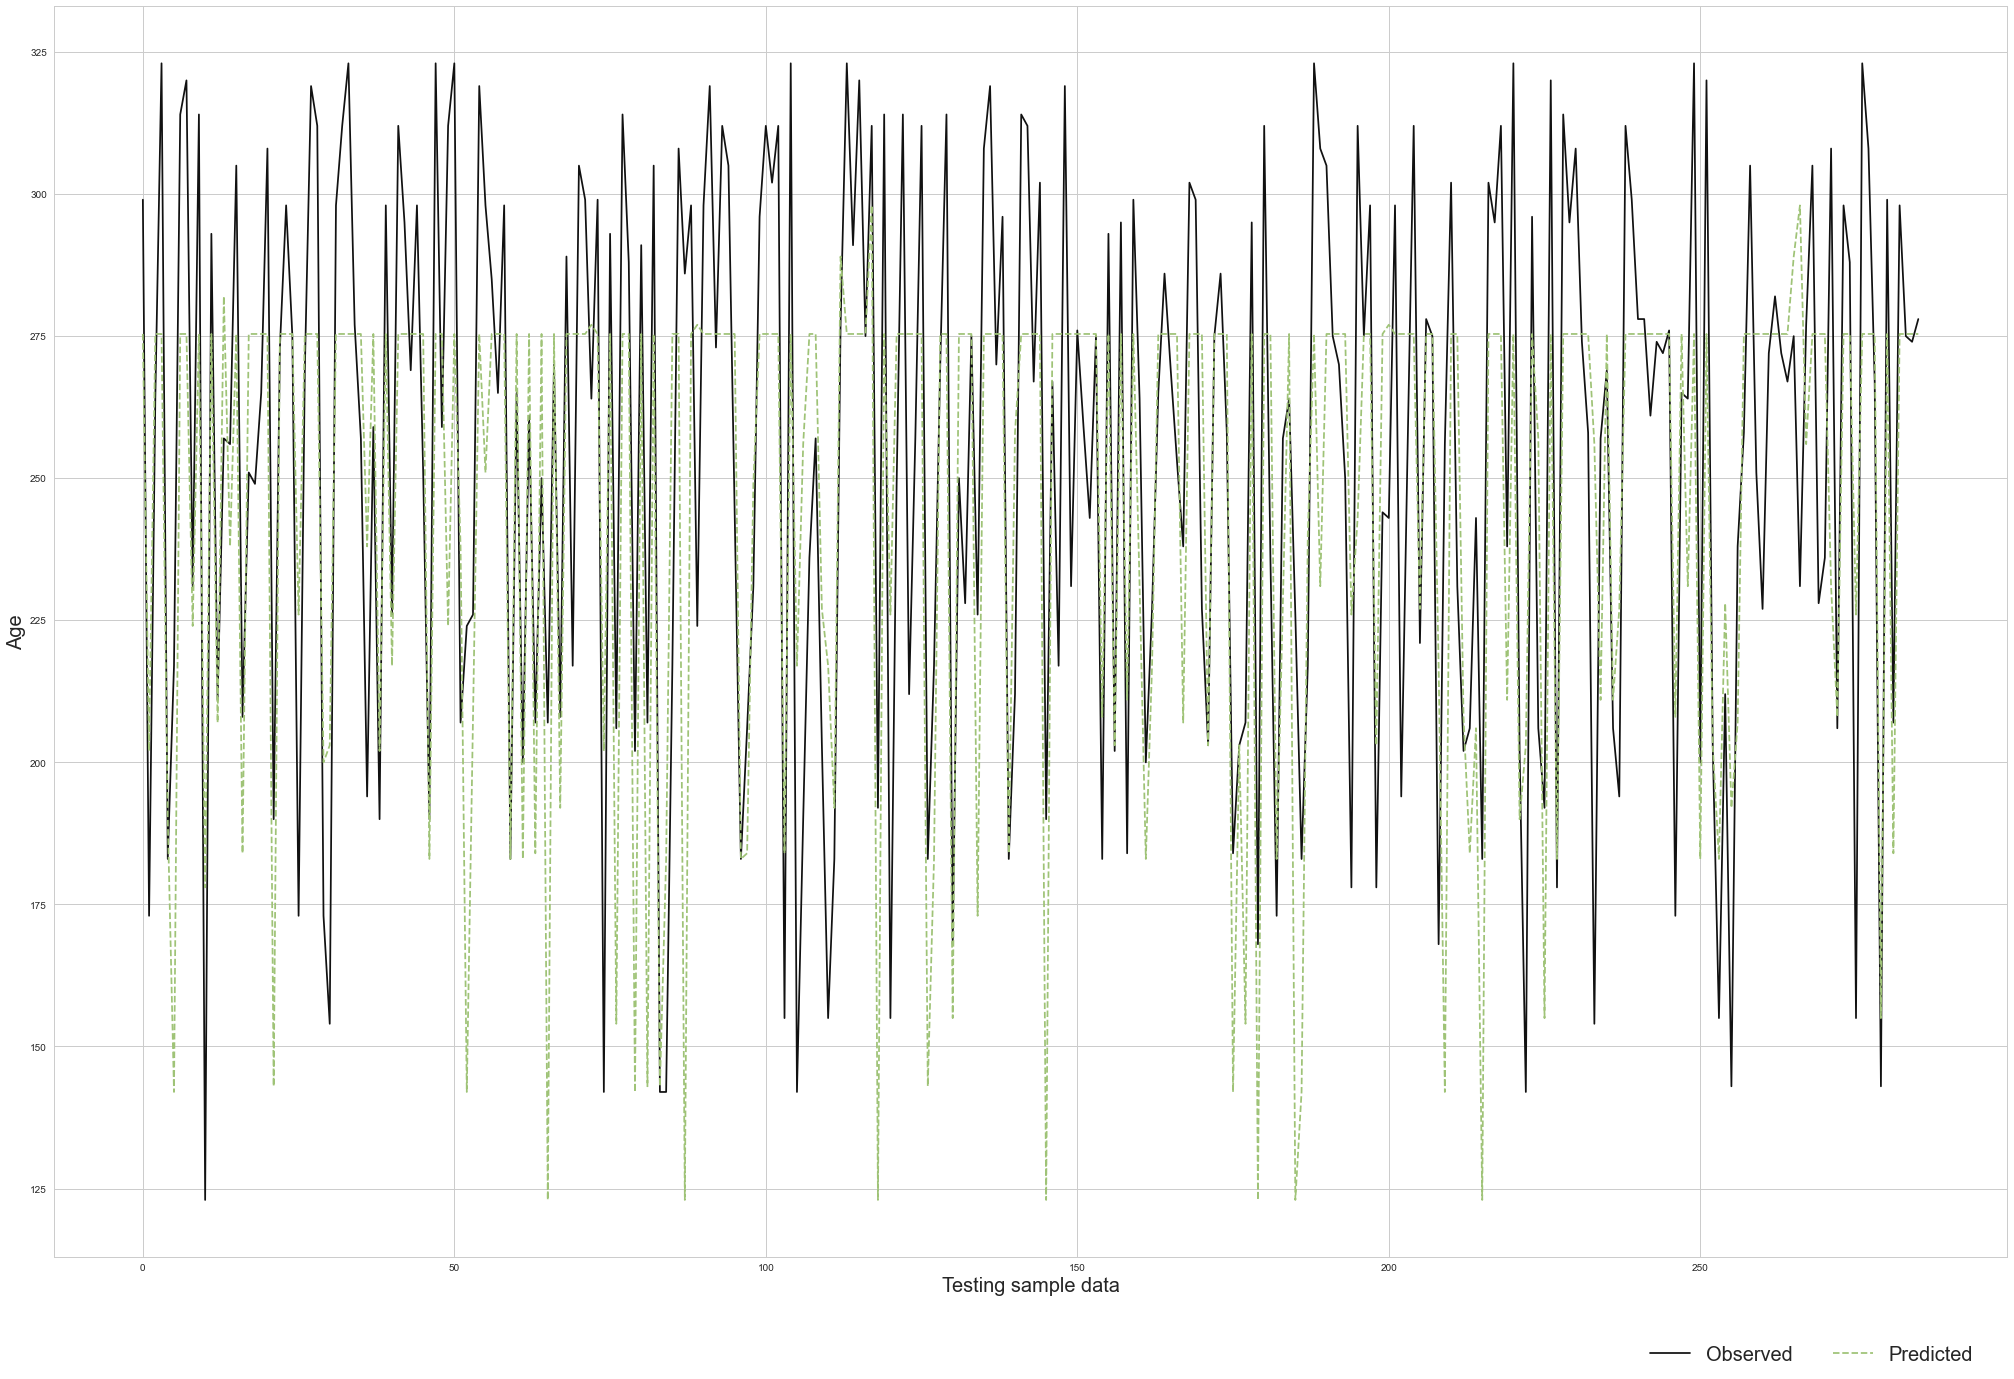

In [33]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (35,23)
x_ax = range(len(X_test))
# Plotting
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, final_prediction, label = 'Predicted', color = 'g', linestyle = '--')
plt.ylabel('Age', fontsize = "20")
plt.xlabel('Testing sample data', fontsize = "20")
plt.legend(bbox_to_anchor = (0.9, -0.1), loc = 'lower center', fontsize = "20", ncol = 2, frameon = False)

In [26]:
# Plotting the prediction error and residuals using yellowbrick
# Anaconda/Cmd prompt and type: pip install yellowbrick!pip install yellowbrick"

In [27]:
!pip install yellowbrick

/Users/vpanci/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


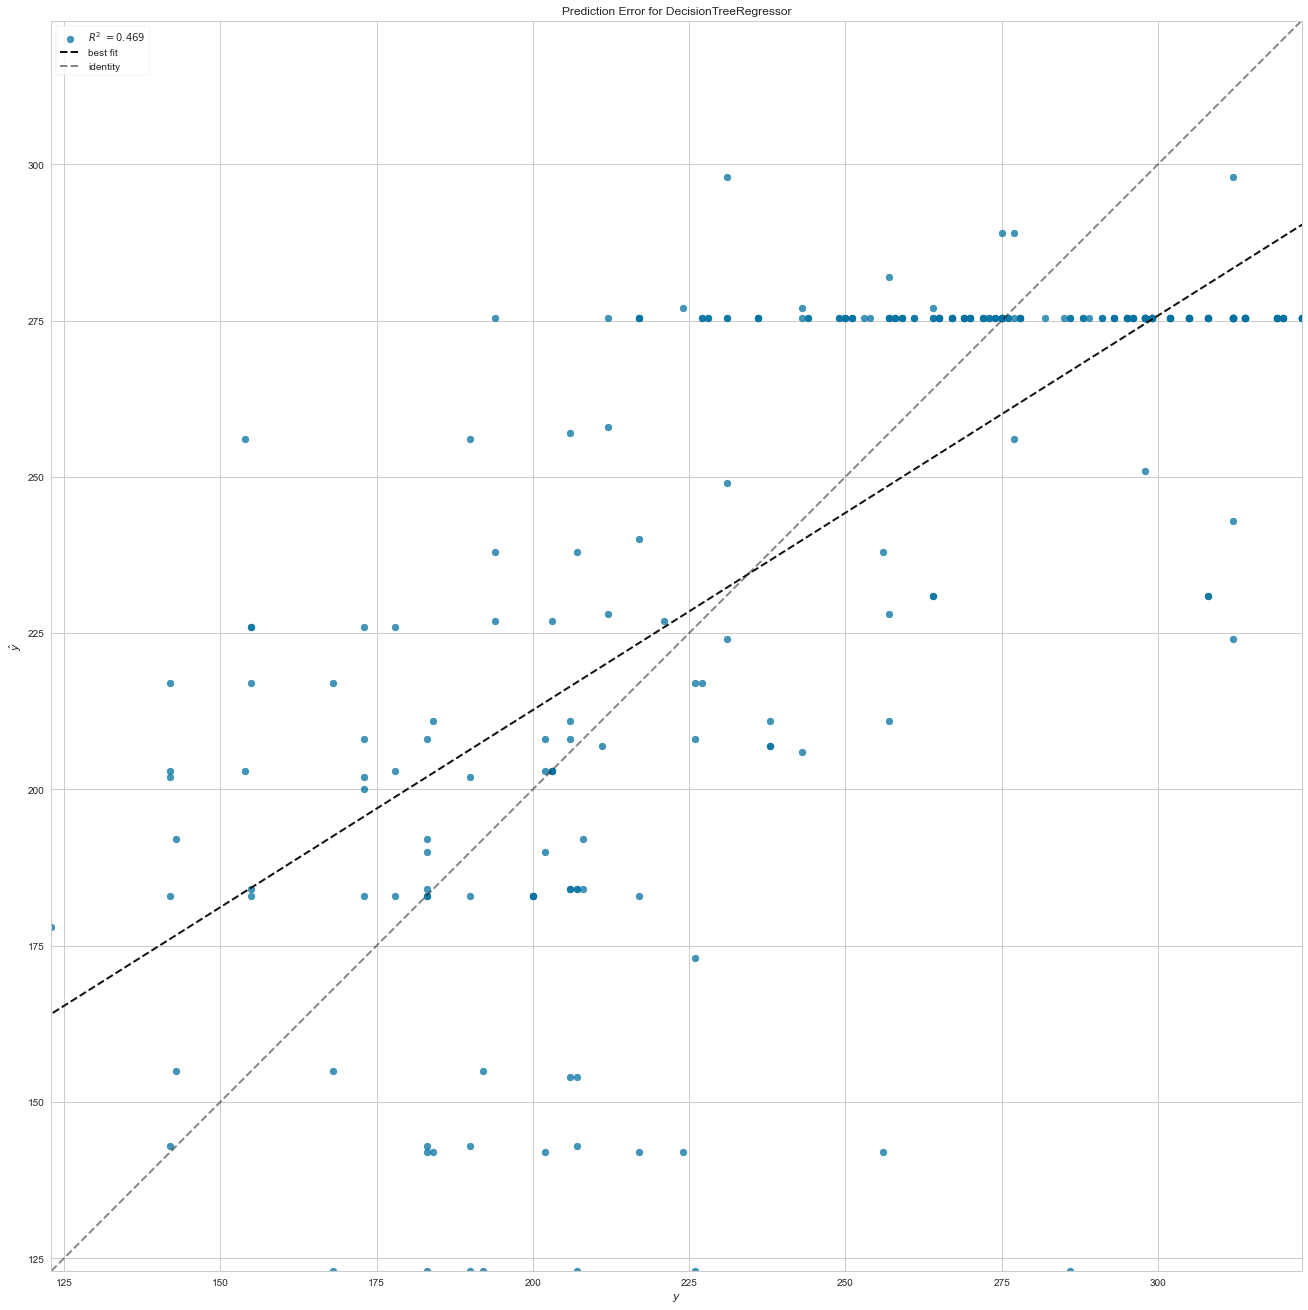

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [34]:
# Plotting the prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(final_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

/Users/vpanci/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


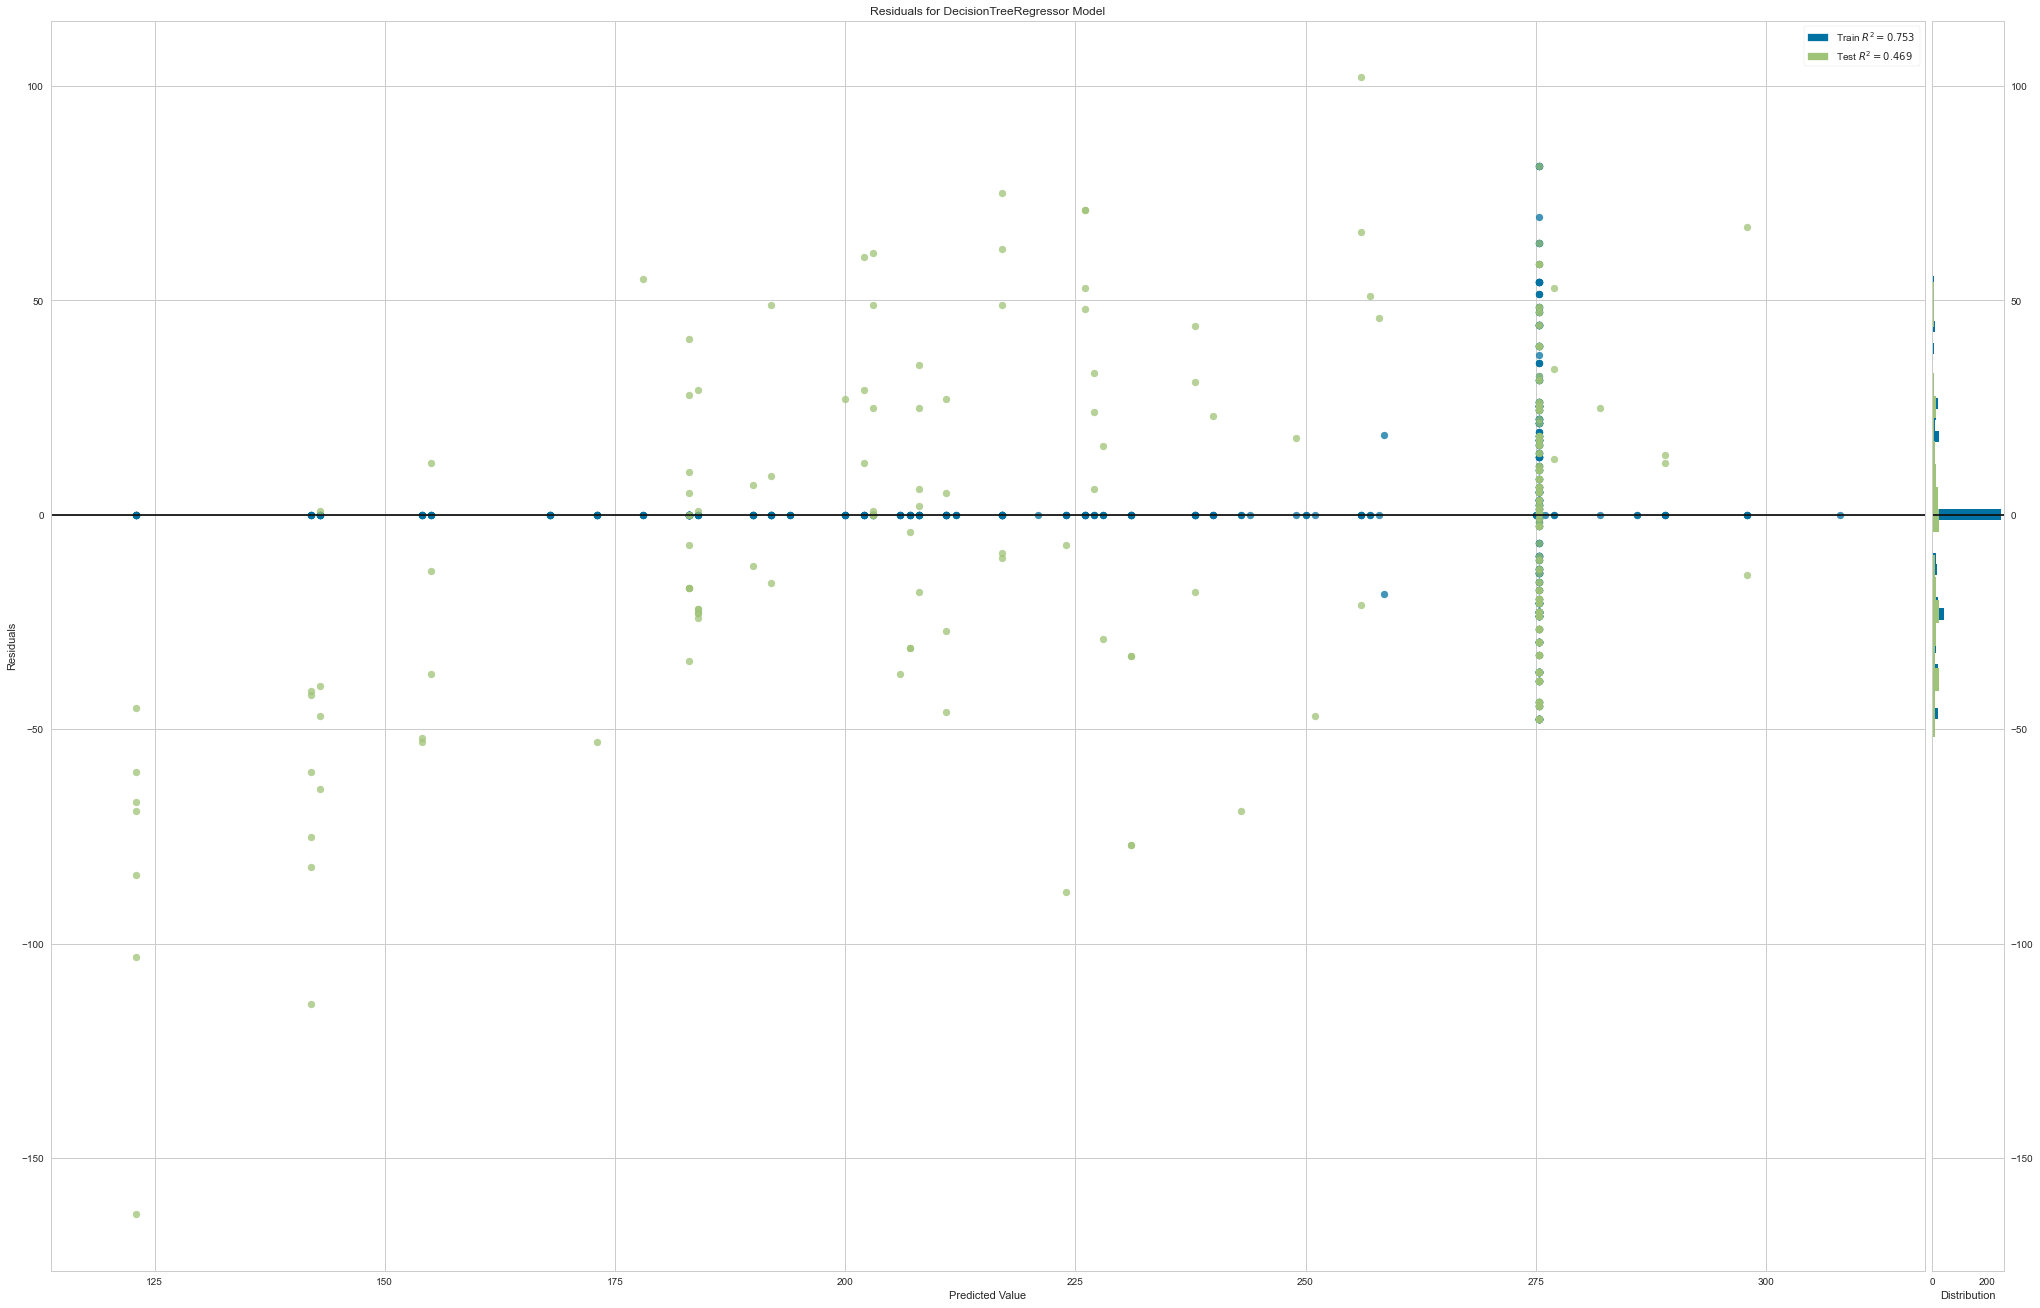

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(final_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [30]:
from sklearn.pipeline import Pipeline

f_list = list(X.columns)
f_importance = pd.Series(final_model.feature_importances_, index = f_list).sort_values(ascending = False)
print(f_importance)

R_area    0.924673
U_area    0.075327
dtype: float64


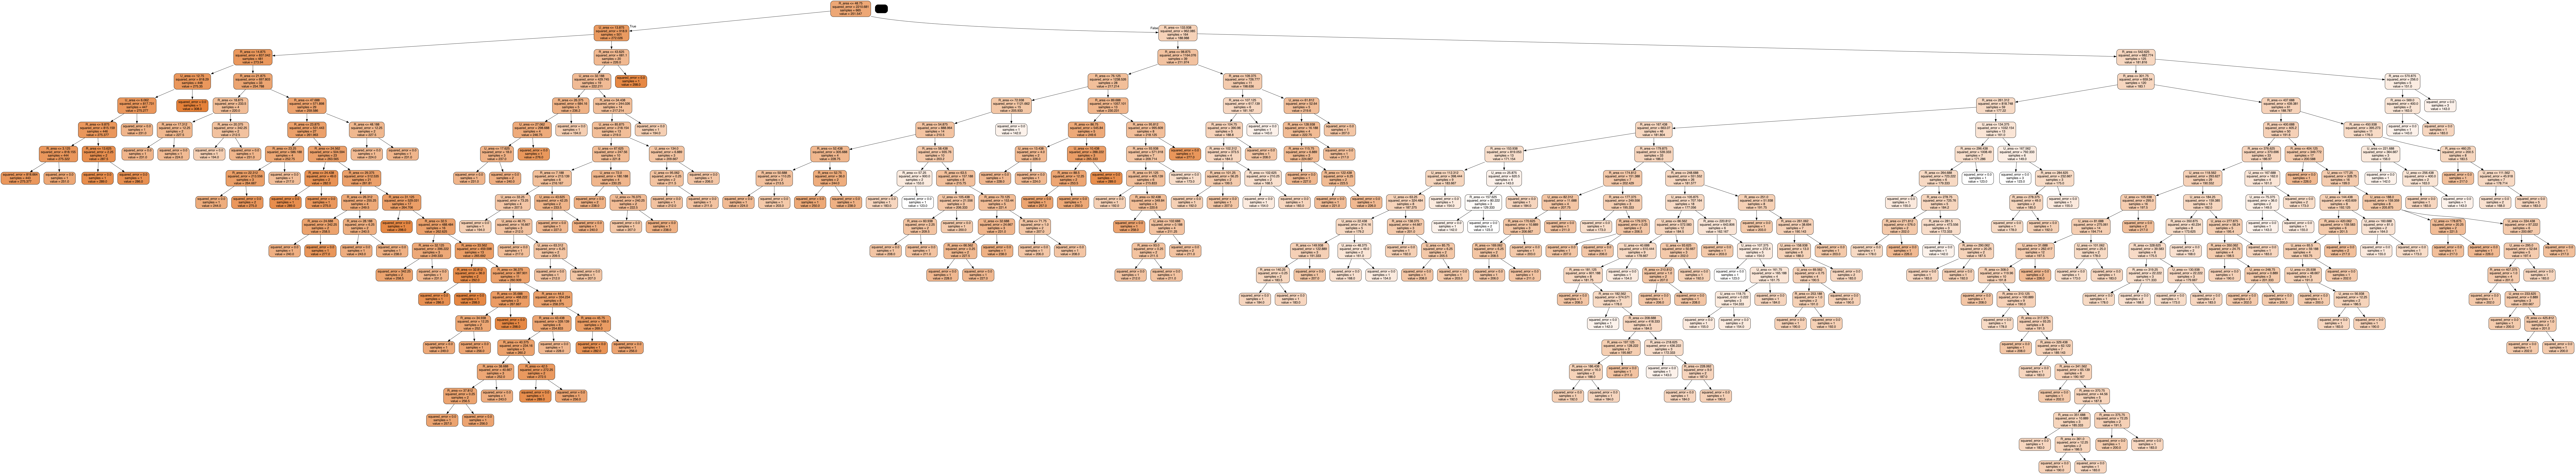

In [31]:
# Visualise the decision trees 
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import os
!pip install pydotplus
import pydotplus

# plotting tree 
dot_data = StringIO()  

export_graphviz(final_model, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['R', "U"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

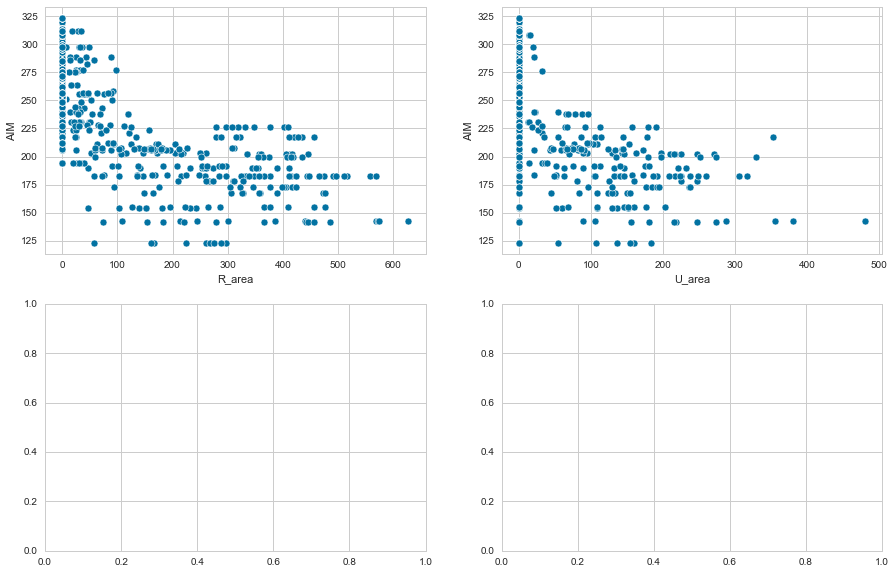

-0.718257685778057
-0.5631327345422366


In [36]:
# Pearson's correlation

# Pearson's correlation set up
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams 
import scipy 
from scipy.stats.stats import pearsonr

%matplotlib inline 
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

mydata = pd.read_csv('MPD-area-radiusandulna-aim.csv')
mydata.columns = ['URN', 'R_area', 'U_area', 'AIM']
X = mydata.drop(['URN', 'AIM'], axis = 1)
y = mydata['AIM']
fig,axis = plt.subplots (2,2, figsize = (15,10))
sb.scatterplot (x = 'R_area', y = 'AIM', data = mydata, ax=axis[0,0])
sb.scatterplot (x = 'U_area', y = 'AIM', data = mydata, ax=axis[0,1])
#sb.scatterplot (x = 'Rep_area', y = 'Age_in_months', data = mydata, ax=axis[1,0])
#sb.scatterplot (x = 'Uep_area', y = 'Age_in_months', data = mydata, ax=axis[1,1])
plt.show()

corr1,_ = pearsonr(mydata['AIM'], mydata['R_area'])
corr2,_ = pearsonr(mydata['AIM'], mydata['U_area'])
print(corr1)
print(corr2)